# Importing the libraries and reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
marketeer_level_prob = pd.read_csv("Case Study Data\\marketeer_level_prob.csv",header=None)
marketeer_revenues = pd.read_csv("Case Study Data\\marketeer_revenues.csv",header=None)
marketer_capacity_decision = pd.read_csv("Case Study Data\\marketer_capacity_decision.csv",header=None)
revenues_2021 = pd.read_csv("Case Study Data\\2021_revenues.csv",header=None)

In [3]:
# Construct a dict that holds the payoff matrices of each year
payoffs_dict_years = {}
for year in range(2013,2021):
    payoffs_dict_years[str(year)] = np.empty((3,6))
    kickoff_ind = (year-2013)*18
    for row in range(3):
        payoffs_dict_years[str(year)][row] = marketeer_revenues[kickoff_ind:kickoff_ind+6].transpose()
        kickoff_ind += 6

In [4]:
for year in range(2013,2021):
    print(year,'\n',payoffs_dict_years[str(year)],'\n')

2013 
 [[7393. 5395. 2000. 7943. 2489. 7138.]
 [3884. 6947. 5005. 2340. 5722. 2500.]
 [5875. 6887. 6886. 6376. 5746. 5026.]] 

2014 
 [[3808. 7575. 2895. 5088. 5314. 4970.]
 [5147. 4543. 5806. 6231. 2949. 6977.]
 [3207. 5089. 5041. 7227. 3231. 7292.]] 

2015 
 [[5408. 3006. 3163. 7681. 5499. 2045.]
 [6387. 2071. 6598. 4951. 6254. 5376.]
 [2779. 6361. 5796. 6520. 5184. 4047.]] 

2016 
 [[2181. 7554. 2675. 7312. 7436. 3795.]
 [7343. 7177. 5991. 3592. 2157. 5297.]
 [6551. 4564. 7081. 7600. 3971. 7210.]] 

2017 
 [[5820. 6271. 5180. 7041. 5306. 4947.]
 [3536. 2478. 5011. 7256. 4681. 4364.]
 [6714. 4198. 5337. 7468. 4781. 6669.]] 

2018 
 [[4695. 6978. 2783. 3306. 4014. 3795.]
 [6965. 4800. 2565. 2401. 5126. 4884.]
 [6713. 4583. 5705. 2047. 4565. 3672.]] 

2019 
 [[7320. 6005. 7550. 2061. 4116. 5946.]
 [3902. 2759. 3274. 3043. 2520. 6465.]
 [5037. 6955. 5534. 4886. 5695. 6468.]] 

2020 
 [[6071. 3310. 6150. 7597. 2304. 3673.]
 [7393. 5044. 3842. 6726. 4331. 3177.]
 [6438. 7656. 7769. 4531. 

In [5]:
# Construct a dict that holds the probability matrices of each year
probs_dict_years = {}
for year in range(2013,2021):
    kickoff_ind = (year-2013)*6
    probs_dict_years[str(year)] = marketeer_level_prob[kickoff_ind:kickoff_ind+6].values.squeeze()

In [6]:
for year in range(2013,2021):
    print(year,'\n',probs_dict_years[str(year)],'\n')

2013 
 [0.24576477 0.24154581 0.13299161 0.05851051 0.14789063 0.17329667] 

2014 
 [0.11530339 0.0323602  0.04184019 0.17041022 0.3287662  0.3113198 ] 

2015 
 [0.45585421 0.21272441 0.10848857 0.00140342 0.04105573 0.18047366] 

2016 
 [0.07902593 0.07656787 0.13680146 0.16901634 0.25846189 0.28012649] 

2017 
 [0.18774931 0.2462164  0.1630849  0.14419076 0.0606472  0.19811144] 

2018 
 [0.46036776 0.00427948 0.17563501 0.29145957 0.04676519 0.021493  ] 

2019 
 [0.01138155 0.14836236 0.33008233 0.1400916  0.06173792 0.30834424] 

2020 
 [0.41855265 0.0805915  0.12690114 0.12182171 0.22560791 0.02652509] 



# 1)

> ## EOL

In [7]:
def get_EOL(year_matrix, year_probs):
    loss_matrix = np.max(year_matrix,axis=0) - year_matrix
    actions_EOL = np.sum(loss_matrix * year_probs,axis=1)
    best_action = np.argmin(actions_EOL)+1 
    return best_action , actions_EOL[best_action-1]

In [8]:
actions_EOL = []
for year in range(2013,2021):
    year_eol_action = get_EOL(payoffs_dict_years[str(year)], probs_dict_years[str(year)])[0]
    year_actual_action = marketer_capacity_decision.iloc[year-2013,1]
    print(year, 'Based On EOL:  ',year_eol_action)
    print(year, 'Actual:  ',year_actual_action)
    actions_EOL.append(year_eol_action)
    if year_eol_action == year_actual_action:
        print("Matching")
    else:
        print("Not Matching")
    print("\n\n")

2013 Based On EOL:   3
2013 Actual:   1
Not Matching



2014 Based On EOL:   3
2014 Actual:   1
Not Matching



2015 Based On EOL:   2
2015 Actual:   3
Not Matching



2016 Based On EOL:   3
2016 Actual:   2
Not Matching



2017 Based On EOL:   3
2017 Actual:   1
Not Matching



2018 Based On EOL:   3
2018 Actual:   1
Not Matching



2019 Based On EOL:   3
2019 Actual:   2
Not Matching



2020 Based On EOL:   2
2020 Actual:   3
Not Matching





> ## EMV

In [9]:
def get_EMV_matrix(year_matrix, year_probs):
    return np.sum(year_matrix * year_probs,axis=1)
    
def get_EMV_predicted(year_matrix, year_probs):
    actions_EMV = get_EMV_matrix(year_matrix , year_probs)
    best_action = np.argmax(actions_EMV)+1 
    return best_action , actions_EMV[best_action-1]

def get_EMV_for_action(year_matrix, year_probs, action):
    actions_EMV = get_EMV_matrix(year_matrix , year_probs)
    return action , actions_EMV[action-1]

In [10]:
payoffs_dict_years

{'2013': array([[7393., 5395., 2000., 7943., 2489., 7138.],
        [3884., 6947., 5005., 2340., 5722., 2500.],
        [5875., 6887., 6886., 6376., 5746., 5026.]]),
 '2014': array([[3808., 7575., 2895., 5088., 5314., 4970.],
        [5147., 4543., 5806., 6231., 2949., 6977.],
        [3207., 5089., 5041., 7227., 3231., 7292.]]),
 '2015': array([[5408., 3006., 3163., 7681., 5499., 2045.],
        [6387., 2071., 6598., 4951., 6254., 5376.],
        [2779., 6361., 5796., 6520., 5184., 4047.]]),
 '2016': array([[2181., 7554., 2675., 7312., 7436., 3795.],
        [7343., 7177., 5991., 3592., 2157., 5297.],
        [6551., 4564., 7081., 7600., 3971., 7210.]]),
 '2017': array([[5820., 6271., 5180., 7041., 5306., 4947.],
        [3536., 2478., 5011., 7256., 4681., 4364.],
        [6714., 4198., 5337., 7468., 4781., 6669.]]),
 '2018': array([[4695., 6978., 2783., 3306., 4014., 3795.],
        [6965., 4800., 2565., 2401., 5126., 4884.],
        [6713., 4583., 5705., 2047., 4565., 3672.]]),
 '20

In [11]:
actions_EMV = []
diff_perc = []
emv_payoff = []
actual_payoffs = []

for year in range(2013,2021):
    year_emv_action = get_EMV_predicted(payoffs_dict_years[str(year)], probs_dict_years[str(year)])
    year_actual_action = marketer_capacity_decision.iloc[year-2013,1]
    payoff_actual = get_EMV_for_action(payoffs_dict_years[str(year)], probs_dict_years[str(year)],year_actual_action)
    
    print(year, 'Based On EMV:  ',year_emv_action)
    print(year, 'Actual:  ',payoff_actual)
    
    # Actions predicted by the EMV algorithm over years
    actions_EMV.append(year_emv_action[0])
    
    # Payoffs of the outcome of the EMV 
    emv_payoff.append(year_emv_action[1])
    
    # Actual payoffs
    actual_payoffs.append(payoff_actual[1])
    
    # Relative Difference between Predicted and actual
    diff_perc.append((year_emv_action[1]-payoff_actual[1])*100/year_emv_action[1])
    
    if year_emv_action[1] > payoff_actual[1]:
        print("Predicted is Higher")
    else:
        print("Chosen was Higher")

    print("\n\n")

2013 Based On EMV:   (3, 6117.005880838689)
2013 Actual:   (1, 5455.902208121184)
Predicted is Higher



2014 Based On EMV:   (3, 5309.31766384714)
2014 Actual:   (1, 4966.70135007345)
Predicted is Higher



2015 Based On EMV:   (2, 5301.837938675208)
2015 Actual:   (3, 4201.118685558186)
Predicted is Higher



2016 Based On EMV:   (3, 6166.434231611513)
2016 Actual:   (2, 4597.831660210599)
Predicted is Higher



2017 Based On EMV:   (3, 5852.525419026457)
2017 Actual:   (1, 5798.602229821516)
Predicted is Higher



2018 Based On EMV:   (3, 5001.082452938969)
2018 Actual:   (1, 3912.927768526715)
Predicted is Higher



2019 Based On EMV:   (3, 5946.320256672174)
2019 Actual:   (2, 4109.755919500261)
Predicted is Higher



2020 Based On EMV:   (2, 5869.168349492563)
2020 Actual:   (3, 5592.881510777901)
Predicted is Higher





In [12]:
# Average relative difference across years
np.mean(diff_perc)

15.216562476504656

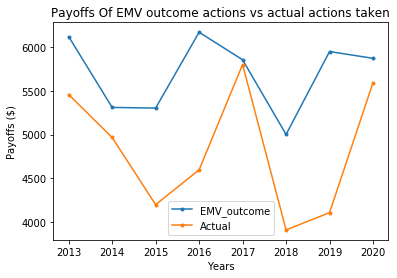

In [13]:
years = [str(x) for x in range(2013,2021)]
_ = plt.plot(years,emv_payoff, marker='.')
_ = plt.plot(years,actual_payoffs, marker='.')
_ = plt.legend(["EMV_outcome","Actual"])
_ = plt.xlabel("Years")
_ = plt.ylabel("Payoffs ($)")
_ =plt.title("Payoffs Of EMV outcome actions vs actual actions taken")

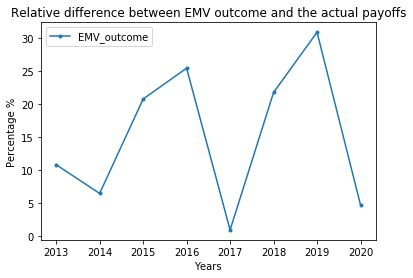

In [14]:
_ = plt.plot(years,diff_perc, marker='.')
_ = plt.legend(["EMV_outcome","Actual"])
_ = plt.xlabel("Years")
_ = plt.ylabel("Percentage %")
_ =plt.title("Relative difference between EMV outcome and the actual payoffs")

# 2)

> ## Maxi-min (Pessismitic)

In [15]:
def maxi_min(year_matrix):
    min_payoff_events = np.min(year_matrix,axis = 1)
    return (np.argmax(min_payoff_events)+1)

In [16]:
actions_MaxiMin = []
diff_perc = []
maxi_min_payoff = []
actual_payoffs = []

for year in range(2013,2021):
    pessimistic_action = maxi_min(payoffs_dict_years[str(year)])
    year_actual_action = marketer_capacity_decision.iloc[year-2013,1]
    payoffs = get_EMV_matrix(payoffs_dict_years[str(year)] , probs_dict_years[str(year)])
    
    print(year, 'Pessismistic Manager Decision:  ',pessimistic_action)
    print(year, 'Pessismistic Manager Payoffs:  ',np.max(np.min(payoffs_dict_years[str(year)],axis=1)))
    print(year, 'Actual Decision:  ',year_actual_action)
    print(year, 'Actual Manager Payoffs:  ',payoffs[year_actual_action-1])
    
    payoff_pred = np.max(np.min(payoffs_dict_years[str(year)],axis=1))
    payoff_act = payoffs[year_actual_action-1]
    
    # Actions predicted by the EMV algorithm over years
    actions_MaxiMin.append(pessimistic_action)
    
    # Payoffs of the outcome of the EMV 
    maxi_min_payoff.append(payoff_pred)
    
    # Actual payoffs
    actual_payoffs.append(payoff_act)
    
    # Relative Difference between Predicted and actual
    diff_perc.append((payoff_pred-payoff_act)*100/year_emv_action[1])
    
    
    if pessimistic_action == year_actual_action:
        print("-> Same decision")
    elif payoff_pred > payoffs[year_actual_action-1]:
        print("-> Pessimistic Manager was better")
    else:
        print("-> Current Manager is better")
    
    print("\n\n")

2013 Pessismistic Manager Decision:   3
2013 Pessismistic Manager Payoffs:   5026.0
2013 Actual Decision:   1
2013 Actual Manager Payoffs:   5455.902208121184
-> Current Manager is better



2014 Pessismistic Manager Decision:   3
2014 Pessismistic Manager Payoffs:   3207.0
2014 Actual Decision:   1
2014 Actual Manager Payoffs:   4966.70135007345
-> Current Manager is better



2015 Pessismistic Manager Decision:   3
2015 Pessismistic Manager Payoffs:   2779.0
2015 Actual Decision:   3
2015 Actual Manager Payoffs:   4201.118685558186
-> Same decision



2016 Pessismistic Manager Decision:   3
2016 Pessismistic Manager Payoffs:   3971.0
2016 Actual Decision:   2
2016 Actual Manager Payoffs:   4597.831660210599
-> Current Manager is better



2017 Pessismistic Manager Decision:   1
2017 Pessismistic Manager Payoffs:   4947.0
2017 Actual Decision:   1
2017 Actual Manager Payoffs:   5798.602229821516
-> Same decision



2018 Pessismistic Manager Decision:   1
2018 Pessismistic Manager Payo

In [17]:
# Average relative difference across years
np.mean(diff_perc)

-16.73942725903694

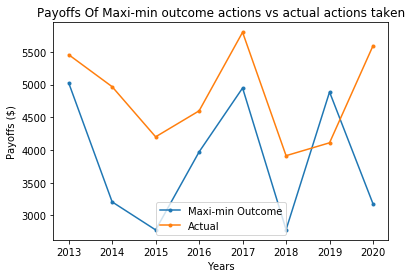

In [18]:
years = [str(x) for x in range(2013,2021)]
_ = plt.plot(years,maxi_min_payoff, marker='.')
_ = plt.plot(years,actual_payoffs, marker='.')
_ = plt.legend(["Maxi-min Outcome","Actual"])
_ = plt.xlabel("Years")
_ = plt.ylabel("Payoffs ($)")
_ =plt.title("Payoffs Of Maxi-min outcome actions vs actual actions taken")

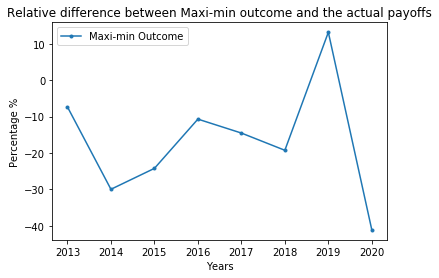

In [19]:
_ = plt.plot(years,diff_perc, marker='.')
_ = plt.legend(["Maxi-min Outcome","Actual"])
_ = plt.xlabel("Years")
_ = plt.ylabel("Percentage %")
_ =plt.title("Relative difference between Maxi-min outcome and the actual payoffs")

> ## Maxi-max (Optimistic)

In [20]:
def maxi_max(year_matrix):
    min_payoff_events = np.max(year_matrix,axis = 1)
    return (np.argmax(min_payoff_events)+1)

In [21]:
actions_MaxiMax = []
diff_perc = []
maxi_max_payoff = []
actual_payoffs = []
for year in range(2013,2021):
    optimistic_action = maxi_max(payoffs_dict_years[str(year)])
    year_actual_action = marketer_capacity_decision.iloc[year-2013,1]
    payoffs = get_EMV_matrix(payoffs_dict_years[str(year)] , probs_dict_years[str(year)])
    
    print(year, 'Optimistic Manager Decision:  ',optimistic_action)
    print(year, 'Optimistic Manager Payoffs:  ',np.max(np.max(payoffs_dict_years[str(year)],axis=1)))
    print(year, 'Actual Decision:  ',year_actual_action)
    print(year, 'Actual Manager Payoffs:  ',payoffs[year_actual_action-1])
    
    payoff_pred = np.max(np.max(payoffs_dict_years[str(year)],axis=1))
    payoff_act = payoffs[year_actual_action-1]
    
    # Actions predicted by the EMV algorithm over years
    actions_MaxiMax.append(optimistic_action)
    
    # Payoffs of the outcome of the EMV 
    maxi_max_payoff.append(payoff_pred)
    
    # Actual payoffs
    actual_payoffs.append(payoff_act)
    
    # Relative Difference between Predicted and actual
    diff_perc.append((payoff_pred-payoff_act)*100/year_emv_action[1])
    
    if optimistic_action == year_actual_action:
        print("-> Same decision")
    elif payoff_pred > payoff_act:
        print("-> Optimistic Manager was better")
    else:
        print("-> Current Manager is better")
    
    print("\n\n")

2013 Optimistic Manager Decision:   1
2013 Optimistic Manager Payoffs:   7943.0
2013 Actual Decision:   1
2013 Actual Manager Payoffs:   5455.902208121184
-> Same decision



2014 Optimistic Manager Decision:   1
2014 Optimistic Manager Payoffs:   7575.0
2014 Actual Decision:   1
2014 Actual Manager Payoffs:   4966.70135007345
-> Same decision



2015 Optimistic Manager Decision:   1
2015 Optimistic Manager Payoffs:   7681.0
2015 Actual Decision:   3
2015 Actual Manager Payoffs:   4201.118685558186
-> Optimistic Manager was better



2016 Optimistic Manager Decision:   3
2016 Optimistic Manager Payoffs:   7600.0
2016 Actual Decision:   2
2016 Actual Manager Payoffs:   4597.831660210599
-> Optimistic Manager was better



2017 Optimistic Manager Decision:   3
2017 Optimistic Manager Payoffs:   7468.0
2017 Actual Decision:   1
2017 Actual Manager Payoffs:   5798.602229821516
-> Optimistic Manager was better



2018 Optimistic Manager Decision:   1
2018 Optimistic Manager Payoffs:   6978.

In [22]:
# Average relative difference across years
np.mean(diff_perc)

47.128224455606556

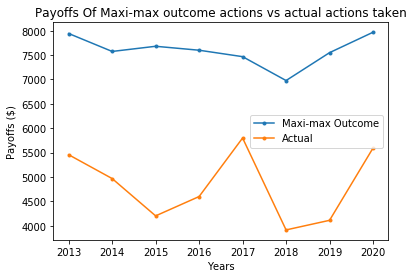

In [23]:
years = [str(x) for x in range(2013,2021)]
_ = plt.plot(years,maxi_max_payoff, marker='.')
_ = plt.plot(years,actual_payoffs, marker='.')
_ = plt.legend(["Maxi-max Outcome","Actual"])
_ = plt.xlabel("Years")
_ = plt.ylabel("Payoffs ($)")
_ =plt.title("Payoffs Of Maxi-max outcome actions vs actual actions taken")

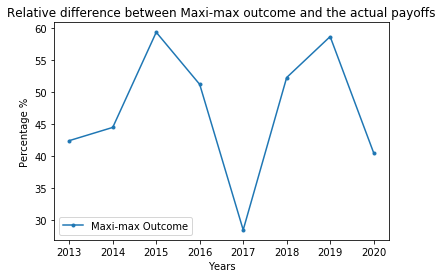

In [24]:
_ = plt.plot(years,diff_perc, marker='.')
_ = plt.legend(["Maxi-max Outcome","Actual"])
_ = plt.xlabel("Years")
_ = plt.ylabel("Percentage %")
_ =plt.title("Relative difference between Maxi-max outcome and the actual payoffs")

# Distribution

In [25]:
# The strategies selected by different models
actions = np.zeros((4,8))

actions[0] = np.array(actions_MaxiMin)
actions[1] = np.array(actions_MaxiMax)
actions[2] = np.array(actions_EOL)
actions[3] = np.array(actions_EMV)

actions

array([[3., 3., 3., 3., 1., 1., 3., 2.],
       [1., 1., 1., 3., 3., 1., 1., 3.],
       [3., 3., 2., 3., 3., 3., 3., 2.],
       [3., 3., 2., 3., 3., 3., 3., 2.]])

In [26]:
# Creating a dataframe with each year and the frequency of each action in the models decisions.
years = [str(x) for x in range(2013,2021)]

df = pd.DataFrame(years)

df["1"]=(actions == 1).sum(axis=0)
df["2"]=(actions == 2).sum(axis=0)
df["3"]=(actions == 3).sum(axis=0)

df.columns = ["year","1","2","3"]

df

,year,1,2,3
0,2013,1,0,3
1,2014,1,0,3
2,2015,1,2,1
3,2016,0,0,4
4,2017,1,0,3
5,2018,2,0,2
6,2019,1,0,3
7,2020,0,3,1


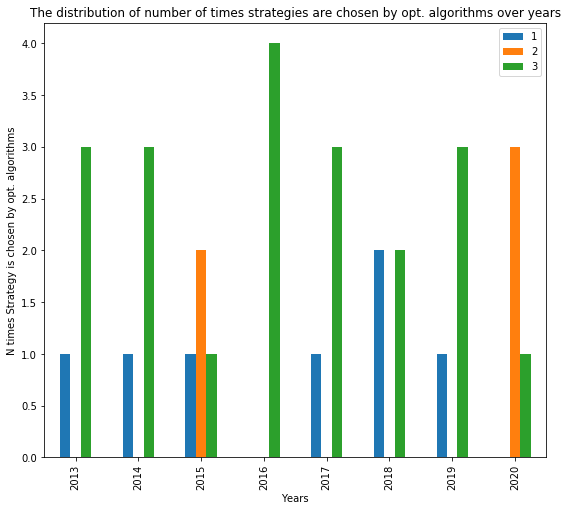

In [27]:
df.plot(x="year", y=["1", "2", "3"], kind="bar",figsize=(9,8))
plt.title("The distribution of number of times strategies are chosen by opt. algorithms over years")
plt.xlabel("Years")
plt.ylabel("N times Strategy is chosen by opt. algorithms")
plt.show()

# Sensitivity analysis on EMV predictions for the 3 actions

In [28]:
# Adding 2021 payoffs 
payoffs_dict_years["2021"] = np.empty((3,6))
kickoff_ind = 0
for row in range(3):
    payoffs_dict_years["2021"][row] = revenues_2021[kickoff_ind:kickoff_ind+6].values.squeeze()
    kickoff_ind += 6

In [29]:
# A function to calculate the p at which the lines intersect
def intersection_p(year_payoffs,action1,action2):
    r11 = payoffs_dict_years["2021"][action1-1,0]
    r12 = payoffs_dict_years["2021"][action1-1,1]
    
    r21 = payoffs_dict_years["2021"][action2-1,0]
    r22 = payoffs_dict_years["2021"][action2-1,1]
    
    return (r22-r12)/(r11+r22-r12-r21)

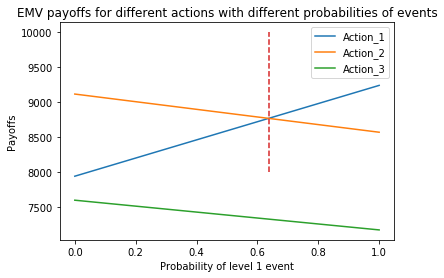

In [30]:
lines_dict = {}
for action in [1,2,3]:
    lines_dict["x"+str(action)] = []
    lines_dict["y"+str(action)] = []
    for prob in [0,0.5,1]:
        lines_dict["x"+str(action)].append(prob)
        lines_dict["y"+str(action)].append(get_EMV_for_action(payoffs_dict_years["2021"][:,:2],np.array([prob,1-prob]),action)[1])
    _ = plt.plot(lines_dict["x"+str(action)],lines_dict["y"+str(action)])
_ = plt.xlabel("Probability of level 1 event")
_ = plt.ylabel("Payoffs")
_ = plt.title("EMV payoffs for different actions with different probabilities of events")
_ = plt.legend(["Action_1","Action_2","Action_3"])
p_inter12 = intersection_p(payoffs_dict_years["2021"][:,:2],1,2)
_ = plt.plot([p_inter12,p_inter12],[8000,10000],linestyle="--")
plt.show()